In [177]:
import pandas as pd
import numpy as np
from sklearn import linear_model  # scikit-learn
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
df = pd.read_csv("nba.csv", sep=",")

df = df.drop(
    columns=["Team", "GP", "WIN%", "FG%", "3P%", "FT%", "L", "3PA", "FTA", "REB", "PTS"]
)  # poistetaan sarakkeita joilla ei ole vaikutusta lopputulokseen


df = df.astype(dtype="float64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     float64
 1   Min     30 non-null     float64
 2   FGM     30 non-null     float64
 3   FGA     30 non-null     float64
 4   3PM     30 non-null     float64
 5   FTM     30 non-null     float64
 6   OREB    30 non-null     float64
 7   DREB    30 non-null     float64
 8   AST     30 non-null     float64
 9   TOV     30 non-null     float64
 10  STL     30 non-null     float64
 11  BLK     30 non-null     float64
 12  BLKA    30 non-null     float64
 13  PF      30 non-null     float64
 14  PFD     30 non-null     float64
dtypes: float64(15)
memory usage: 3.6 KB


In [215]:
print(r2_score.__code__)

<code object wrapper at 0x000001ECC6568320, file "u:\Users\jk026110\linereg\env\Lib\site-packages\sklearn\utils\_param_validation.py", line 182>


In [216]:
# Check for outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each column:")
print(outliers)

Number of outliers in each column:
W       1
Min     2
FGM     0
FGA     0
3PM     2
FTM     0
OREB    0
DREB    1
AST     1
TOV     0
STL     1
BLK     0
BLKA    0
PF      0
PFD     0
dtype: int64


In [180]:
# sns.pairplot(data=df,
#             x_vars=['Min', 'FGM', 'FGA', '3PM', 'FTM', 'OREB', 'DREB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD'],
#             y_vars='W',
#             height=8,
#             kind='reg')




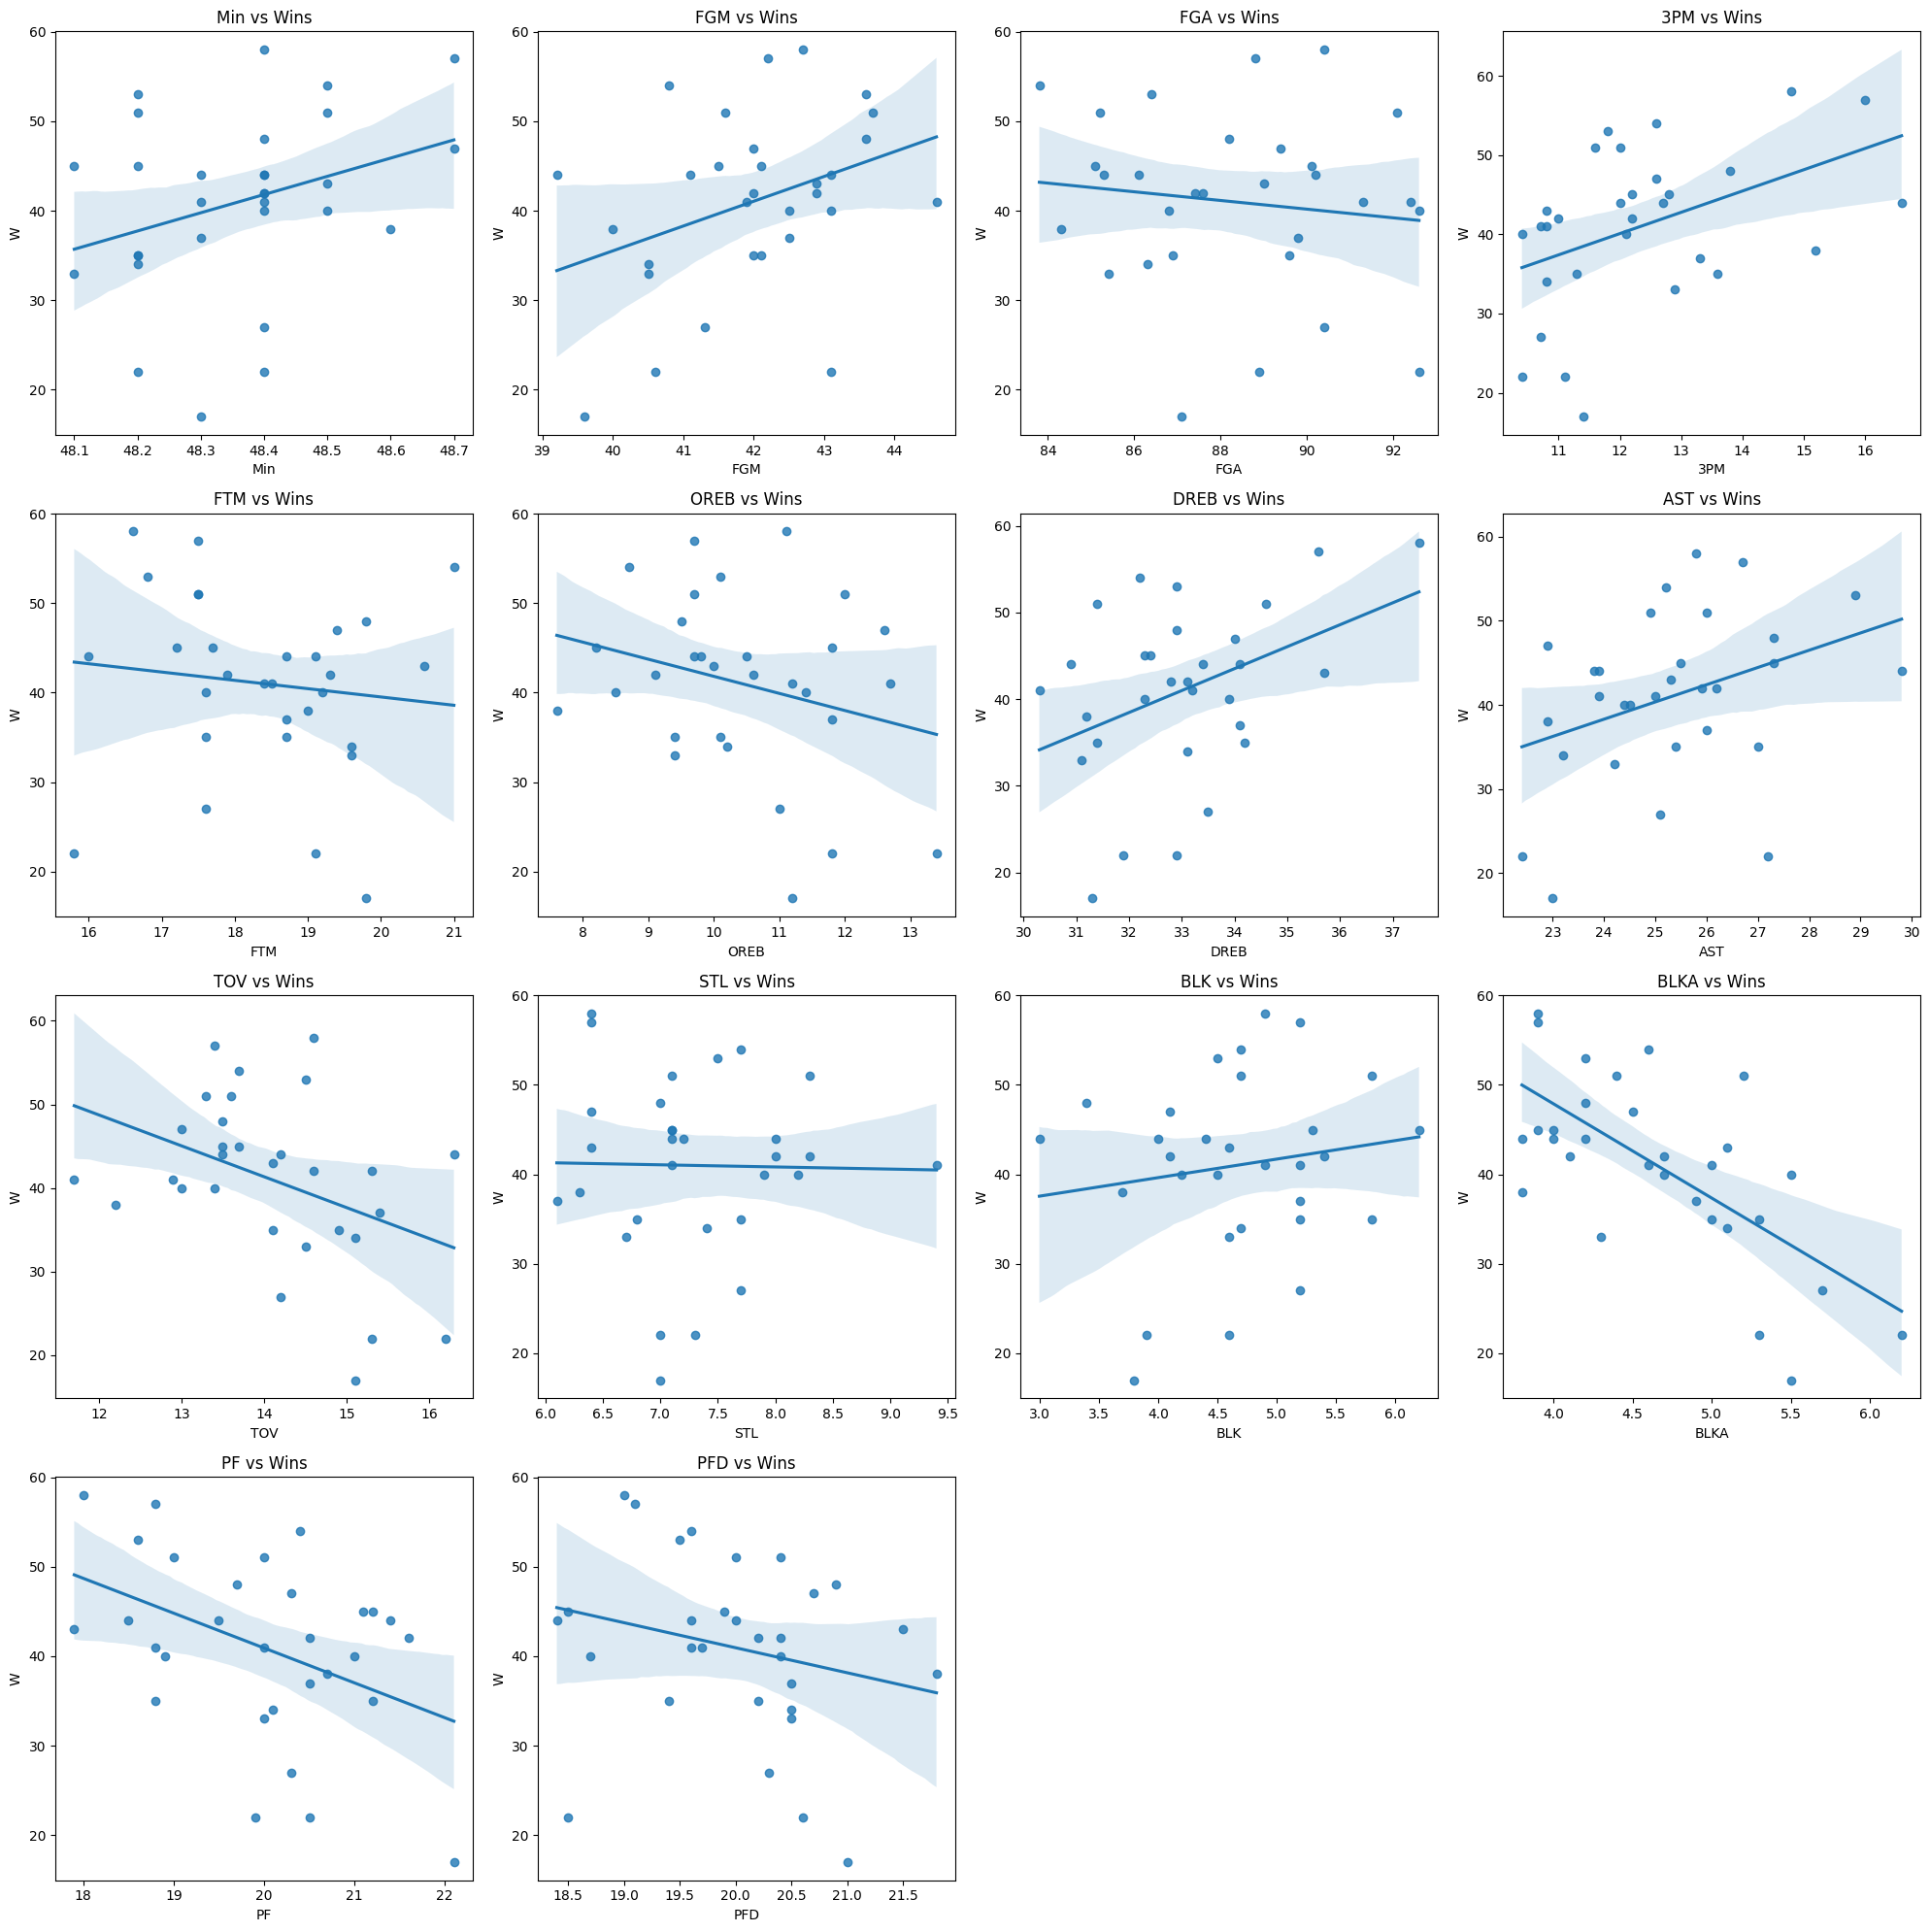

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Oletetaan, että df on datakehys
x_vars = ['Min', 'FGM', 'FGA', '3PM', 'FTM', 'OREB', 'DREB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD']

# Määritä rivi ja sarake -lukumäärä
num_cols = 4
num_rows = int(np.ceil(len(x_vars) / num_cols))

# Luo alikuvasto
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Muokkaa akselit listaksi
axes = axes.flatten()

# Piirrä kuvaajat
for i, x_var in enumerate(x_vars):
    sns.regplot(x=x_var, y='W', data=df, ax=axes[i])
    axes[i].set_title(f'{x_var} vs Wins')

# Poista ylimääräiset akselit, jos on tyhjää
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


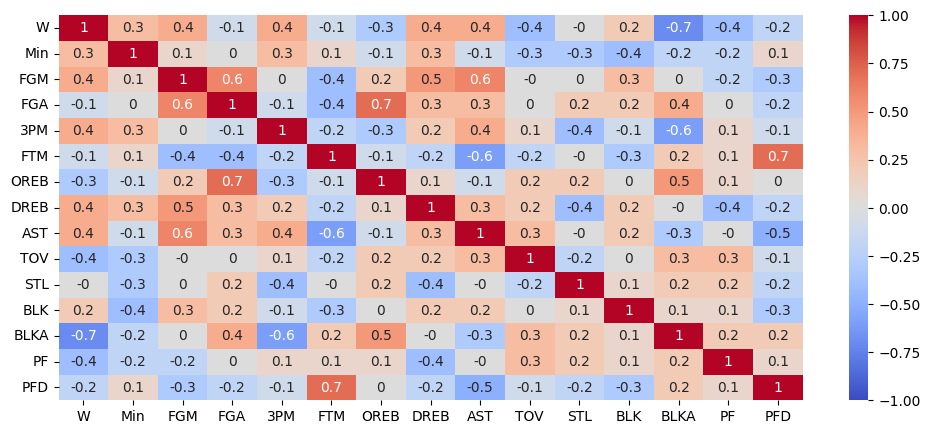

In [182]:
kor = df.corr()  # korrelaatiomatriisi

plt.figure(figsize=(12, 5))

sns.heatmap(kor.round(1), vmin=-1, vmax=1, cmap="coolwarm", annot=True)

plt.show()

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     float64
 1   Min     30 non-null     float64
 2   FGM     30 non-null     float64
 3   FGA     30 non-null     float64
 4   3PM     30 non-null     float64
 5   FTM     30 non-null     float64
 6   OREB    30 non-null     float64
 7   DREB    30 non-null     float64
 8   AST     30 non-null     float64
 9   TOV     30 non-null     float64
 10  STL     30 non-null     float64
 11  BLK     30 non-null     float64
 12  BLKA    30 non-null     float64
 13  PF      30 non-null     float64
 14  PFD     30 non-null     float64
dtypes: float64(15)
memory usage: 3.6 KB


In [184]:
# valmistellaan datan mallinnusta varten

X = df.drop(columns=['W']) # valitaan kaikki muut paitsi voitot W
Y = df[['W']] # valitaan W
# print(X.to_string())
# print(Y)

In [185]:
# jaetaan data testi- ja opetusaineistoon, LIIAN PIENI AINEISTO JAKAMISEEN
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [198]:
# mallinnus
reg = linear_model.LinearRegression()

# sovitetaan arvot malliin
reg.fit(X, Y)

print("intercepts / vakiotermi", reg.intercept_, "\n\nkulmakertoimet:")

# Tulostetaan muuttujat ja kulmakertoimet
for feature, coef in zip(reg.feature_names_in_, reg.coef_[0].round(3)):
    print(f"{feature}:\t{coef}")

intercepts / vakiotermi [-285.72707166] 

kulmakertoimet:
Min:	6.766
FGM:	2.902
FGA:	-2.832
3PM:	2.328
FTM:	1.507
OREB:	3.629
DREB:	1.954
AST:	1.19
TOV:	-2.868
STL:	4.68
BLK:	2.595
BLKA:	-4.894
PF:	-2.041
PFD:	-0.164


In [200]:
y_pred = reg.predict(X)
y_pred_df = pd.DataFrame(y_pred, index=X.index, columns=['Predicted'])

In [201]:
residuals = Y["W"] - y_pred.flatten()
print(residuals)
print(f"residuals keskiarvo {residuals.mean()}")  # pitäisi olla lähellä 0

0     0.380577
1    -2.296506
2     1.365526
3    -1.371248
4    -2.450124
5     5.992775
6    -1.890902
7    -0.789653
8    -1.681828
9    -1.343501
10   -1.052655
11    0.697706
12   -0.508881
13   -0.600777
14    2.914262
15    3.288306
16    2.812890
17   -0.463276
18   -1.587982
19    0.125547
20    5.972758
21    2.360647
22    3.500637
23    2.542433
24   -2.084115
25   -2.337906
26    0.876689
27   -6.817301
28   -1.277132
29   -4.276964
Name: W, dtype: float64
residuals keskiarvo -1.3263464400855204e-13


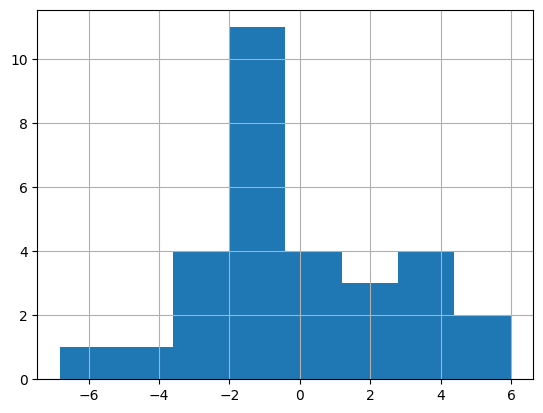

In [189]:
residuals.hist(bins=8)
plt.show()

In [190]:
# mallin hyvyys
rsme = root_mean_squared_error(Y, y_pred)
print(f"RSME: {rsme}")

r2 = r2_score(pd.DataFrame(data=Y)["W"], y_pred)
print(f"R2: {r2}")

RSME: 2.7630889336566438
R2: 0.9214002012152113


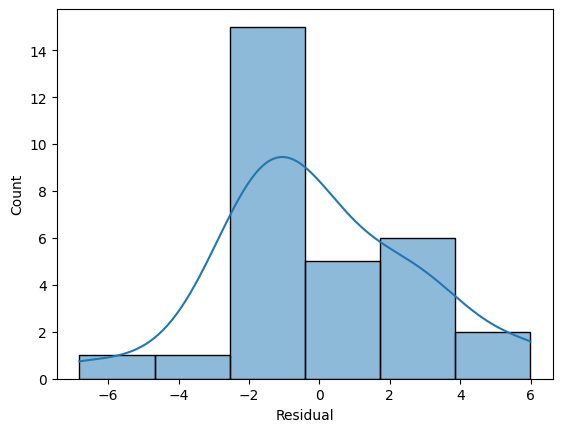

In [191]:
df2 = pd.concat([Y, pd.Series(y_pred.flatten(), index=Y.index, name='Predicted'),residuals], axis=1)
df2.columns = ['Actual', 'Predicted', 'Residual']
sns.histplot(df2['Residual'], kde=True) # kde = True, näyttää tiheysfunktion
plt.show()

In [213]:
df2 = pd.concat(
    [
        Y,
        pd.Series(y_pred.flatten().round(0)),
        pd.Series((Y - y_pred).values.flatten().round(3)),
    ],
    axis=1,
)
df2.columns = ["Y observed", "Y predicted", "residual"]
df2

,Y observed,Y predicted,residual
0,41.0,41.0,0.381
1,57.0,59.0,-2.297
2,45.0,44.0,1.366
3,27.0,28.0,-1.371
4,40.0,42.0,-2.450
5,51.0,45.0,5.993
6,38.0,40.0,-1.891
7,53.0,54.0,-0.790
8,17.0,19.0,-1.682
9,44.0,45.0,-1.344


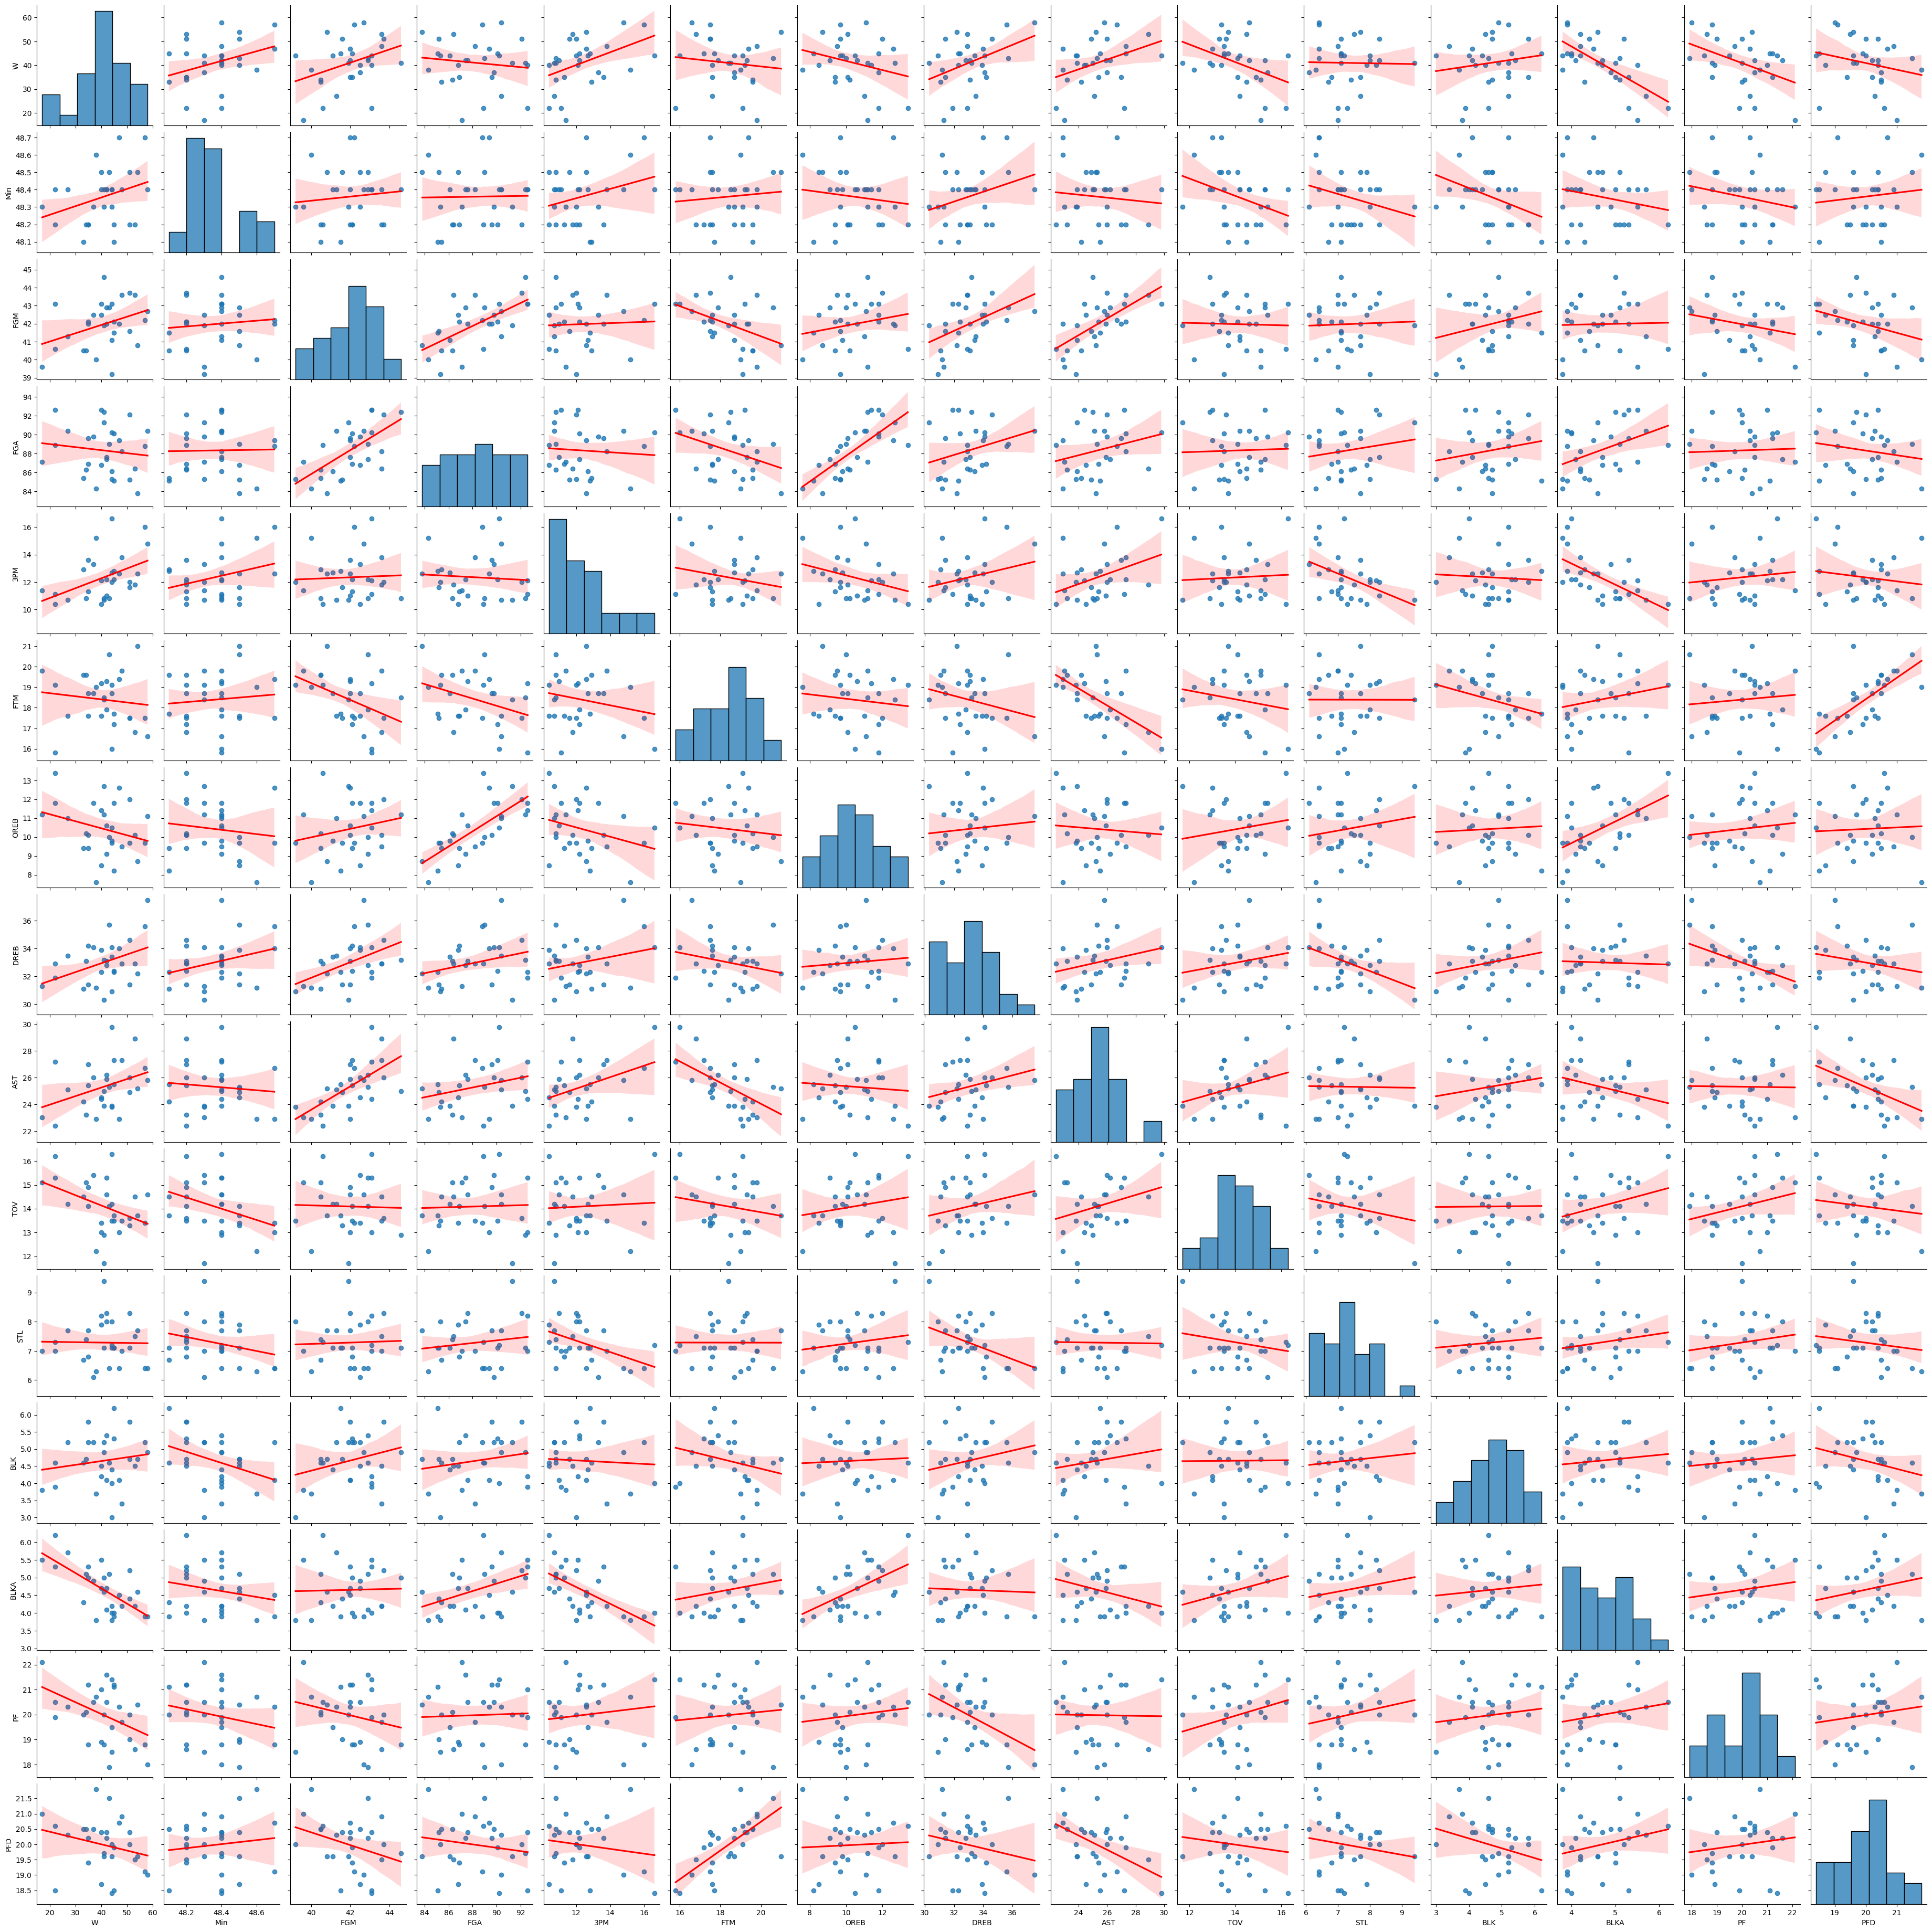

In [217]:
sns.pairplot(
    data=df, kind="reg", plot_kws={"line_kws": {"color": "red"}}
)  # kind = 'reg' lisää regressiosuoran
plt.show()